In [1]:
import pandas as pd
import numpy as np
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

filename = "./data/wine.csv"
df = pd.read_csv(filename)
df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# drop col index
df = df.drop(['index'],axis = 1)

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
# Creating a test/train split

train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]

target = pd.get_dummies(df['quality']).values # One hot encode
#target[:5]

#target = df['quality'].to_numpy()
#target = target.reshape(6497,1)

target

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
# Selecting the features and the target
X_train = df_train.drop('quality', axis = 1).values
X_test = df_test.drop('quality', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197, 7)
(1300, 7)


In [7]:
#X=df.drop('quality',axis=1) 
#y=df['quality'] 
#X,y
#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,test_size=0.2)

In [8]:
X_train = torch.tensor(X_train.astype('int32'))
y_train = torch.tensor(y_train.astype('int32'))
X_test = torch.tensor(X_test.astype('int32'))
y_test = torch.tensor(y_test.astype('int32'))

In [9]:
nb_hidden_neurons = 15
nb_classes = len(pd.unique(df['quality']))
nb_classes

7

In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Network(nn.Module):

    def __init__(self, nb_features):
        """Here we define the layers
        """

        super().__init__()
        
        self.layer_1 =  nn.Linear(nb_features,nb_hidden_neurons)
        self.layer_2 =  nn.Linear(nb_hidden_neurons,nb_hidden_neurons)
        self.layer_3 =  nn.Linear(nb_hidden_neurons,nb_classes)
        
        

    def forward(self,x):
        """Here we combine the layers
        """
        
        activation_function = nn.SiLU()
        last_layer_activation = nn.Softmax()
        
        x = activation_function(self.layer_1(x))
        x = activation_function(self.layer_2(x))
        x = last_layer_activation(self.layer_3(x))
    
        return x

In [12]:
my_nn = Network(nb_features=X_train.shape[1])
my_nn

Network(
  (layer_1): Linear(in_features=11, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=7, bias=True)
)

In [13]:
# Select your criterion, your learning rate and your optimizer.
criterion = nn.MSELoss(reduction='sum')
learning_rate = 0.001
optimizer = torch.optim.SGD(my_nn.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(my_nn.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
def training(batch_size : int, nb_steps_loss_sum : int):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,50): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):
            
            # Get input and output
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
            
            # TO COMPLETE:
            # - zero gradient buffers
            optimizer.zero_grad()
            # - compute the forward pass
            output = my_nn(input_batch.float())
            # - compute the loss
            loss = criterion(output, target.float())
            # - backpropagate
            loss.backward()
            # - do a step
            optimizer.step()
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb+= 1
        
    return loss_list

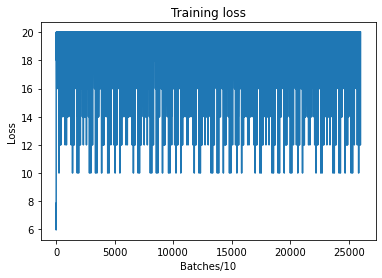

In [15]:
nb_steps_loss_sum = 10
loss = training(batch_size=1, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()
plt.close()

In [16]:
def computeScore(X, y):
    correct = 0
    total = 0
    batch_size = 1
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):

            # TO COMPLETE:
            
            # - get the `batch_size` number of input samples
            # - compute the prediction of the neural network
            output = my_nn(X.float())
            # - get the max of the prediction (e.g. get the most likely class)
            max_pred = torch.max(output, 1)
            # This can be done using `torch.max`.
            # - get the max of the target (e.g. correct class)
            max_target = torch.max(y, 1)
     
            # - check if the prediction is correct and count it
            if max_pred[1][idx] == max_target[1][idx]:
                correct += 1
            total = total + 1
                
            # - count every sample
 

    accuracy = correct/total * 100
    print(f"Accuracy of the network on the {total} samples: {accuracy:.2f}%")

In [17]:
computeScore(X_train, y_train)
computeScore(X_test, y_test)

Accuracy of the network on the 104 samples: 0.96%
Accuracy of the network on the 26 samples: 0.00%


torch.Size([1300, 11])

In [18]:

for hidden in range(3, 12, 1):
    print(hidden)


3
4
5
6
7
8
9
10
11


tensor([[ 7,  0,  0,  ...,  3,  0,  9],
        [ 7,  0,  0,  ...,  3,  0,  9],
        [ 7,  0,  0,  ...,  3,  0,  9],
        ...,
        [ 6,  0,  0,  ...,  3,  0, 10],
        [ 7,  0,  0,  ...,  3,  0, 12],
        [ 7,  0,  0,  ...,  3,  0, 10]], dtype=torch.int32)